# Binance Trading bot

Notes:
1. Some terminology. *Base*: means the crypto we are trading. *Quote*: Is the stablecoin we use (i.e., crypto pegged to US$).
1. Add a *credentials.json* with your api keys in the same folder as the notebook.
1. So far the script has only executed sell orders, because I kill it everyday when I go to work it never bought crypto.
1. Api Documentation: https://python-binance.readthedocs.io/en/latest/index.html

In [2]:
%matplotlib notebook

import json
import time
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

from binance.client import Client
from binance.enums import *
from binance.helpers import round_step_size

## Connect to server

In [3]:
creds = json.load(open('credentials.json'))

client = Client(creds['api_key'], creds['api_secret'])
print('Problem connecting') if client.get_system_status()['status'] else print('Server is up')

Server is up


## Parameters

In [7]:
base = 'BTC' # crypto
quote = 'BUSD' # stablecoin
pair = base + quote # trading pair

interval = 60 # frequency of price check
reset = 200 # after how many checks reset the reference price
diff = 1.0007 # price difference threshold for order execution

## Functions

In [9]:
# Gets current price of base denominated in quote
def getPrice():
    return float(client.get_symbol_ticker(symbol = pair)['price'])

# Gets amount of base and quote assets that are free to trade (i.e., not held by an order)
def getAssets():
    assets = {}
    wallet = client.get_account()['balances']
    for a in wallet:
        if a['asset'] == base:
            assets[base] = float(a['free'])
        if a['asset'] == quote:
            assets[quote] = float(a['free'])
    return assets   

# Gets current balance in quote
def getBalance():
    baseVal = getPrice() * getAssets()[base]
    quoteVal = getAssets()[quote]
    return baseVal + quoteVal

# Buy when the price stops dropping
def buy(prevPrice):
    while getPrice() < prevPrice:
        prevPrice = getPrice()
        time.sleep(interval)
    lastPrice = getPrice()
    print('Buy:', lastPrice, ', Order:', makeOrder('BUY'))
        
# Sell whe the price stops growing
def sell(prevPrice):
    while getPrice() > prevPrice:
        prevPrice = getPrice()
        time.sleep(interval)
    lastPrice = getPrice()
    print('Sell:', lastPrice, ', Order:', makeOrder('SELL'))    

# DANGER ZONE
# Executes a market order
# Use create_test_order(.) to test. If all goes well it returns {}
def makeOrder(s):
    if s == 'BUY':
#         q = getAssets()[quote]
        return client.create_order(symbol = pair, side = s, type = 'MARKET', quoteOrderQty = 190)
    q = str(getAssets()[base]) 
    q = float(q[:-3])
    return client.create_order(symbol = pair, side = s, type = 'MARKET', quantity = q)
    
def plot():
    for i, s in enumerate(stats):
        ax[i].cla()
        ax[i].plot(stats[s])
        ax[i].title.set_text(s)
        ax[i].ticklabel_format(useOffset=False)
    fig.tight_layout()
    fig.canvas.draw()      

## Trading loop

<IPython.core.display.Javascript object>


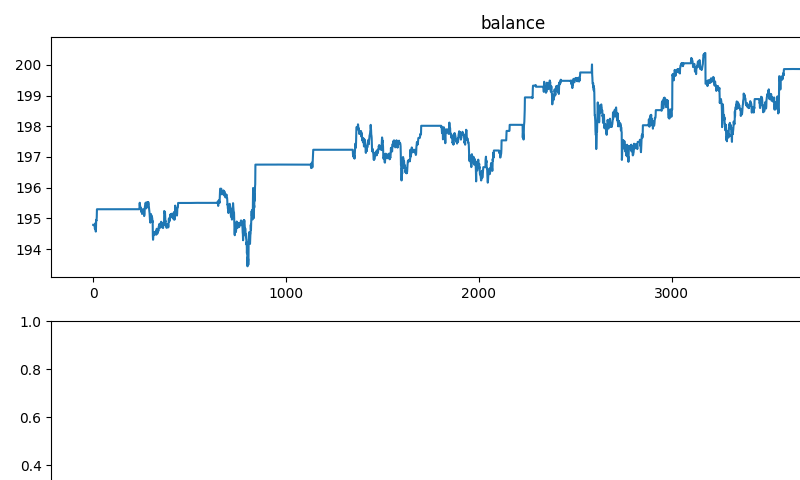

Buy: 20115.35 , Order: {'symbol': 'BTCBUSD', 'orderId': 6673071537, 'orderListId': -1, 'clientOrderId': 'EINZiTqz56nG3B9NhyM7MS', 'transactTime': 1666742449002, 'price': '0.00000000', 'origQty': '0.00944000', 'executedQty': '0.00944000', 'cummulativeQuoteQty': '189.88786560', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'fills': [{'price': '20115.24000000', 'qty': '0.00944000', 'commission': '0.00000000', 'commissionAsset': 'BNB', 'tradeId': 559185403}]}
Sell: 20115.0 , Order: {'symbol': 'BTCBUSD', 'orderId': 6673132579, 'orderListId': -1, 'clientOrderId': 'sx3lMPM2ONf80ddfpyX8QS', 'transactTime': 1666742630603, 'price': '0.00000000', 'origQty': '0.00944000', 'executedQty': '0.00944000', 'cummulativeQuoteQty': '189.88560000', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'SELL', 'fills': [{'price': '20115.00000000', 'qty': '0.00944000', 'commission': '0.00000000', 'commissionAsset': 'BNB', 'tradeId': 559195452}]}
Buy: 20087.97 , Order

Buy: 20842.5 , Order: {'symbol': 'BTCBUSD', 'orderId': 6695537195, 'orderListId': -1, 'clientOrderId': 'pRQylqIUwvn1AOfGLRnM2M', 'transactTime': 1666825983357, 'price': '0.00000000', 'origQty': '0.00911000', 'executedQty': '0.00911000', 'cummulativeQuoteQty': '189.88483160', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'fills': [{'price': '20843.56000000', 'qty': '0.00911000', 'commission': '0.00000000', 'commissionAsset': 'BNB', 'tradeId': 562752887}]}
Sell: 20806.95 , Order: {'symbol': 'BTCBUSD', 'orderId': 6699661078, 'orderListId': -1, 'clientOrderId': 'mcPigWF8CDRN4HQs1UYwia', 'transactTime': 1666845081964, 'price': '0.00000000', 'origQty': '0.00911000', 'executedQty': '0.00911000', 'cummulativeQuoteQty': '189.54023510', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'SELL', 'fills': [{'price': '20805.74000000', 'qty': '0.00075000', 'commission': '0.00000000', 'commissionAsset': 'BNB', 'tradeId': 563285426}, {'price': '20805.74000

Buy: 20525.02 , Order: {'symbol': 'BTCBUSD', 'orderId': 6708745239, 'orderListId': -1, 'clientOrderId': 'px4RTdtMthdEC11zmm9bdI', 'transactTime': 1666878763983, 'price': '0.00000000', 'origQty': '0.00925000', 'executedQty': '0.00925000', 'cummulativeQuoteQty': '189.86062500', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'fills': [{'price': '20525.36000000', 'qty': '0.00375000', 'commission': '0.00000000', 'commissionAsset': 'BNB', 'tradeId': 564556649}, {'price': '20525.55000000', 'qty': '0.00550000', 'commission': '0.00000000', 'commissionAsset': 'BNB', 'tradeId': 564556650}]}
Sell: 20623.0 , Order: {'symbol': 'BTCBUSD', 'orderId': 6709065169, 'orderListId': -1, 'clientOrderId': 'iMq52PzPAXuOu5E0MIOyn0', 'transactTime': 1666879490331, 'price': '0.00000000', 'origQty': '0.00925000', 'executedQty': '0.00925000', 'cummulativeQuoteQty': '190.75359250', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'SELL', 'fills': [{'price': '20622.01000

Sell: 20297.72 , Order: {'symbol': 'BTCBUSD', 'orderId': 6718787553, 'orderListId': -1, 'clientOrderId': 'SA4fS6Sr0ARTZFmNB72DJr', 'transactTime': 1666921327973, 'price': '0.00000000', 'origQty': '0.00938000', 'executedQty': '0.00938000', 'cummulativeQuoteQty': '190.39767880', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'SELL', 'fills': [{'price': '20298.26000000', 'qty': '0.00938000', 'commission': '0.00000000', 'commissionAsset': 'BNB', 'tradeId': 565948838}]}
Buy: 20239.18 , Order: {'symbol': 'BTCBUSD', 'orderId': 6719181148, 'orderListId': -1, 'clientOrderId': 'VlkNjDDIyjOqwANZdTxELn', 'transactTime': 1666923266850, 'price': '0.00000000', 'origQty': '0.00938000', 'executedQty': '0.00938000', 'cummulativeQuoteQty': '189.84374000', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'fills': [{'price': '20239.20000000', 'qty': '0.00498000', 'commission': '0.00000000', 'commissionAsset': 'BNB', 'tradeId': 565996141}, {'price': '20239.2100

Buy: 20575.52 , Order: {'symbol': 'BTCBUSD', 'orderId': 6736118965, 'orderListId': -1, 'clientOrderId': 'Kqz6AR4HXbV5rxxMyFWXhv', 'transactTime': 1667001785704, 'price': '0.00000000', 'origQty': '0.00923000', 'executedQty': '0.00923000', 'cummulativeQuoteQty': '189.92423320', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'fills': [{'price': '20576.84000000', 'qty': '0.00923000', 'commission': '0.00000000', 'commissionAsset': 'BNB', 'tradeId': 568295937}]}
Sell: 20613.75 , Order: {'symbol': 'BTCBUSD', 'orderId': 6736617803, 'orderListId': -1, 'clientOrderId': 'aqkFDIcuiXgRQGn872gD58', 'transactTime': 1667004936681, 'price': '0.00000000', 'origQty': '0.00923000', 'executedQty': '0.00923000', 'cummulativeQuoteQty': '190.26075900', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'SELL', 'fills': [{'price': '20613.30000000', 'qty': '0.00923000', 'commission': '0.00000000', 'commissionAsset': 'BNB', 'tradeId': 568349318}]}


In [ ]:
stats = defaultdict(list)
order = 'BUY' # order to execute

lastPrice = getPrice()
counter = 0

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 6))
while True:
    
    counter += 1
    if counter == reset:
        counter = 0
        lastPrice = getPrice()
        
    currentPrice = getPrice()
    
    # buy crypto
    if currentPrice <= lastPrice / diff and order == 'BUY':
        buy(currentPrice)
        counter = 0
        order = 'SELL'
        
    # sell crypto
    elif currentPrice >= lastPrice * diff and order == 'SELL':
        sell(currentPrice)
        counter = 0
        order = 'BUY'

    stats['balance'].append(getBalance())

    bal = stats['balance']
    print(bal[-1]/bal[0], '|', bal[-1]-bal[0], '|', counter , '|', currentPrice, '|', lastPrice, '|', lastPrice*diff, '|', lastPrice/diff, end='\r')
    plot()
    time.sleep(interval)
    

{}